In [13]:
import pybamm
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
model = pybamm.lithium_ion.SPMe()
param = pybamm.ParameterValues("Chen2020")
param["Current function [A]"] = "[input]"

In [15]:
time_step = 100 #[s]
final_time =60000 #[s]
max_step = int(final_time/time_step)
#i = [random.randint(-2, 2) for _ in range(max_step)]
i = [1 for _ in range(max_step)]
soc_0 = param['Initial concentration in negative electrode [mol.m-3]']/param['Maximum concentration in negative electrode [mol.m-3]']

In [16]:
soc_0 = 1

In [17]:
sim = pybamm.Simulation(model, parameter_values=param)
sim.build(check_model=True, initial_soc=soc_0)

In [18]:
step = 0
while step < int(final_time/time_step): 
    sim.step(dt=time_step,npts = 2, save=True, inputs={'Current function [A]': i[step]})
    solution = sim.solution
    n = len(solution["Time [s]"].entries)-1
    time = solution["Time [s]"].entries[n]
    current = solution['Current [A]'].entries[n]
    discharge_capacity = solution['Discharge capacity [A.h]'].entries[n]
    soc = soc_0 - discharge_capacity/param['Nominal cell capacity [A.h]']
    voltage = round(solution['Voltage [V]'].entries[n],2)
    current = solution['Current [A]'].entries[n]
    print('Time:', time,'SoC:', round(soc,5), 'Current:',round(current,2),'Voltage:', voltage,'Discharge capacity:',round(discharge_capacity,2))
    if voltage == param['Upper voltage cut-off [V]']:
        print('Upper cut-off voltage of', param['Upper voltage cut-off [V]'], '[V] was reached!')
        break
    if voltage == param['Lower voltage cut-off [V]']:
        print('Lower cut-off voltage of', param['Lower voltage cut-off [V]'], '[V] was reached!')
        break
    step += 1
sim.plot(["Current [A]", "Voltage [V]"])

Time: 100.0 SoC: 0.99444 Current: 1.0 Voltage: 4.12 Discharge capacity: 0.03
Time: 200.0 SoC: 0.98889 Current: 1.0 Voltage: 4.1 Discharge capacity: 0.06
Time: 300.0 SoC: 0.98333 Current: 1.0 Voltage: 4.09 Discharge capacity: 0.08
Time: 400.0 SoC: 0.97778 Current: 1.0 Voltage: 4.09 Discharge capacity: 0.11
Time: 500.0 SoC: 0.97222 Current: 1.0 Voltage: 4.08 Discharge capacity: 0.14
Time: 600.0 SoC: 0.96667 Current: 1.0 Voltage: 4.07 Discharge capacity: 0.17
Time: 700.0 SoC: 0.96111 Current: 1.0 Voltage: 4.07 Discharge capacity: 0.19
Time: 800.0 SoC: 0.95556 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.22
Time: 900.0 SoC: 0.95 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.25
Time: 1000.0 SoC: 0.94444 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.28
Time: 1100.0 SoC: 0.93889 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.31
Time: 1200.0 SoC: 0.93333 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.33
Time: 1300.0 SoC: 0.92778 Current: 1.0 Voltage: 4.06 Discharge capacity: 0.36

interactive(children=(FloatSlider(value=0.0, description='t', max=5.1166141226105655, step=0.05116614122610565…

In [19]:
solution = sim.solution

In [20]:
len(i)

600

In [21]:
time = solution["Time [s]"].entries
soc = soc_0 - solution['Discharge capacity [A.h]'].entries/param['Nominal cell capacity [A.h]']
voltage = solution['Voltage [V]']
discharge_capacity = solution['Discharge capacity [A.h]'].entries


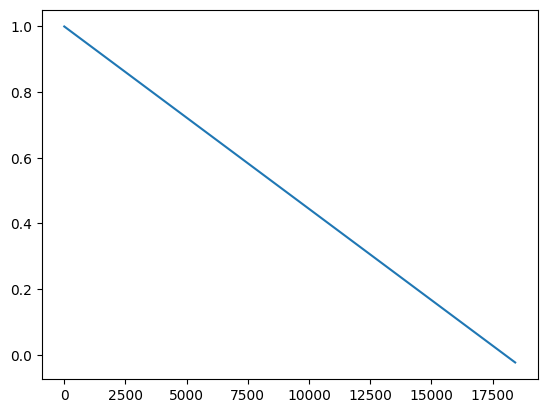

In [22]:
plt.plot(time,soc)

In [23]:
time

array([    0.       ,   100.       ,   100.       ,   200.       ,
         200.       ,   300.       ,   300.       ,   400.       ,
         400.       ,   500.       ,   500.       ,   600.       ,
         600.       ,   700.       ,   700.       ,   800.       ,
         800.       ,   900.       ,   900.       ,  1000.       ,
        1000.       ,  1100.       ,  1100.       ,  1200.       ,
        1200.       ,  1300.       ,  1300.       ,  1400.       ,
        1400.       ,  1500.       ,  1500.       ,  1600.       ,
        1600.       ,  1700.       ,  1700.       ,  1800.       ,
        1800.       ,  1900.       ,  1900.       ,  2000.       ,
        2000.       ,  2100.       ,  2100.       ,  2200.       ,
        2200.       ,  2300.       ,  2300.       ,  2400.       ,
        2400.       ,  2500.       ,  2500.       ,  2600.       ,
        2600.       ,  2700.       ,  2700.       ,  2800.       ,
        2800.       ,  2900.       ,  2900.       ,  3000.    

In [24]:
solution["Voltage [V]"].entries

array([4.15534703, 4.11892271, 4.11892271, 4.10458598, 4.10458598,
       4.09409644, 4.09409644, 4.08572935, 4.08572935, 4.07887751,
       4.07887751, 4.07323828, 4.07323828, 4.06861319, 4.06861319,
       4.06485495, 4.06485495, 4.06184093, 4.06184093, 4.05945705,
       4.05945705, 4.05759523, 4.05759523, 4.05614897, 4.05614897,
       4.05501297, 4.05501297, 4.05408409, 4.05408409, 4.05326303,
       4.05326303, 4.05245655, 4.05245655, 4.05157953, 4.05157953,
       4.05055693, 4.05055693, 4.04932528, 4.04932528, 4.04783362,
       4.04783362, 4.04604383, 4.04604383, 4.04393048, 4.04393048,
       4.04148018, 4.04148018, 4.03869043, 4.03869043, 4.03556832,
       4.03556832, 4.03212899, 4.03212899, 4.02839397, 4.02839397,
       4.02438961, 4.02438961, 4.02014559, 4.02014559, 4.01569352,
       4.01569352, 4.0110657 , 4.0110657 , 4.00629423, 4.00629423,
       4.00141003, 4.00141003, 3.99644235, 3.99644235, 3.99141817,
       3.99141817, 3.98636198, 3.98636198, 3.9812955 , 3.98129